In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from collections import defaultdict, Counter

# Importamos los datos del CSV

In [4]:


price = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(0), delimiter=",",encoding='utf-8', skip_header=1, dtype=int)
bedrooms = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(2), delimiter=",",encoding='utf-8', skip_header=1, dtype=int)
bathrooms = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(1), delimiter=",", encoding='utf-8', skip_header=1, dtype=int)
m2 = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(3), delimiter=",", encoding='utf-8', skip_header=1, dtype=int)
address = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(4), delimiter=",", encoding='utf-8', skip_header=1, dtype=str)


In [5]:
print(price.dtype, price.dtype, bedrooms.dtype, bathrooms.dtype, m2.dtype, address.dtype)
print(price.shape, bedrooms.shape, bathrooms.shape, m2.shape, address.shape)

int64 int64 int64 int64 int64 <U31
(915,) (915,) (915,) (915,) (915,)


In [6]:
print(address.shape)

(915,)


## Obtencion de los datos estadisticos 

### FUNCION QUE RETORNA UN DICCIONARIO CON LOS DATOS ESTADISTICOS 
- Mínimo
- Mínimo 
- Máximo
- Media
- Cuartiles Q1, Q2 (mediana) y Q3
- Rango intercuartil
- Desviación estándar

In [7]:
def estadisticos(array):
    # Crear diccionario
    estadisticas = dict()
 
    # Calcular estadisticas y agregar estadísticas al diccionario
    estadisticas['minimo'] = min_valor = np.min(array)
    estadisticas['maximo'] = np.max(array)
    estadisticas['media'] = np.mean(array)
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    estadisticas['Q1'] = Q1
    estadisticas['Q2/mediana'] = np.median(array)
    estadisticas['Q3'] = Q3
    estadisticas['rango_intercuartil'] = Q3 - Q1
    estadisticas['desviacion_estandar'] = np.std(array)
    
    # Retornar el diccionario creado
    return estadisticas


### Impresion de los datos estadisticos calculados en el diccionario

In [8]:
def imprimir_estadisticas(estadisticas):
    print(f"Minimo: {estadisticas['minimo']:,}")
    print(f"Maximo: {estadisticas['maximo']:,}")
    print(f"Media: {estadisticas['media']:,.3f}")
    print(f"Q1 (Primer Cuartil): {estadisticas['Q1']:,.2f}")
    print(f"Q2 (Mediana): {estadisticas['Q2/mediana']:,.2f}")
    print(f"Q3 (Tercer Cuartil): {estadisticas['Q3']:,.2f}")
    print(f"Rango Intercuartil: {estadisticas['rango_intercuartil']:,.2f}")
    print(f"Desviación Estándar: {estadisticas['desviacion_estandar']:,.4f}")    

### Se generan la siguiente informacion:
- un grafico de BOXPLOT en el eje superior
- un histograma en el cual se delimitan:
    -  con lineas de colores la media, la mediana el primer cuartil, el tercer cuartil


In [9]:
def plot_data(array, name):
    # Crear la figura y los ejes
    
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(10, 7), sharex=True, gridspec_kw={'height_ratios': [1, 4]})

    # Boxplot en el eje superior
    ax_box.boxplot(array, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), 
                   medianprops=dict(color='red'))
    ax_box.set(title=f'Boxplot de datos {name}', yticks=[])

    # Calcular estadísticos
    media = np.mean(array)
    mediana = np.median(array)
    desviacion_estandar = np.std(array)
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)

    # Filtrar outliers
    outliers_z_score = array[(array < media - 3 * desviacion_estandar) | (array > media + 3 * desviacion_estandar)]
    iqr = Q3 - Q1
    outliers_tukey = array[(array < Q1 - 1.5 * iqr) | (array > Q3 + 1.5 * iqr)]
    
    # Crear el histograma
    ax_hist.hist(array, bins=35, color='palegreen', edgecolor='black')
    
    # Agregar líneas verticales
    ax_hist.axvline(media, color='red', linestyle='-', linewidth=2, label=f'Media: {media:,.1f}')
    ax_hist.axvline(mediana, color='gold', linestyle='-', linewidth=2, label=f'Mediana {mediana:,.1f}')
    ax_hist.axvline(Q1, color='purple', linestyle='--', linewidth=2, label=f'Q1: {Q1:,.1f}')
    ax_hist.axvline(Q3, color='purple', linestyle='--', linewidth=2, label=f'Q3: {Q3:,.1f}')
    ax_hist.axvline(media + 3 * desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label=f'+ Z-Score {(media + 3 * desviacion_estandar):,.1f}')
    ax_hist.axvline(media - 3 * desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label=f'- Z-Score {(media - 3 * desviacion_estandar):,.1f}')
    ax_hist.axvline(Q3 + 1.5 * iqr, color='grey', linestyle='--', linewidth=1, label=f'+ Tukey {(Q3 + 1.5 * iqr):,.1f}')
    ax_hist.axvline(Q1 - 1.5 * iqr, color='grey', linestyle='--', linewidth=1, label=f'- Tukey {(Q1 - 1.5 * iqr):,.1f}')
    
    
    # Marcar los outliers
    ax_hist.scatter(outliers_z_score, np.zeros_like(outliers_z_score), color='blue', s=90, label='Z-Score', marker='o', zorder=5)
    ax_hist.scatter(outliers_tukey, np.zeros_like(outliers_tukey), color='red', alpha=0.5, s=150, label='Tukey', marker='s', zorder=5)
    
    # Agregar leyenda y título
    ax_hist.legend()
    ax_hist.legend()
    ax_hist.set_xlabel('Valor')
    ax_hist.set_ylabel('Frecuencia')
    plt.title('Distribución de datos ' + name)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
    
    sns.kdeplot(array, label=f"Curva de densidad de {name} ")
    plt.legend();


Estadísticos para dormitorios:
Minimo: 0
Maximo: 12
Media: 3.474
Q1 (Primer Cuartil): 2.00
Q2 (Mediana): 3.00
Q3 (Tercer Cuartil): 4.00
Rango Intercuartil: 2.00
Desviación Estándar: 1.5938


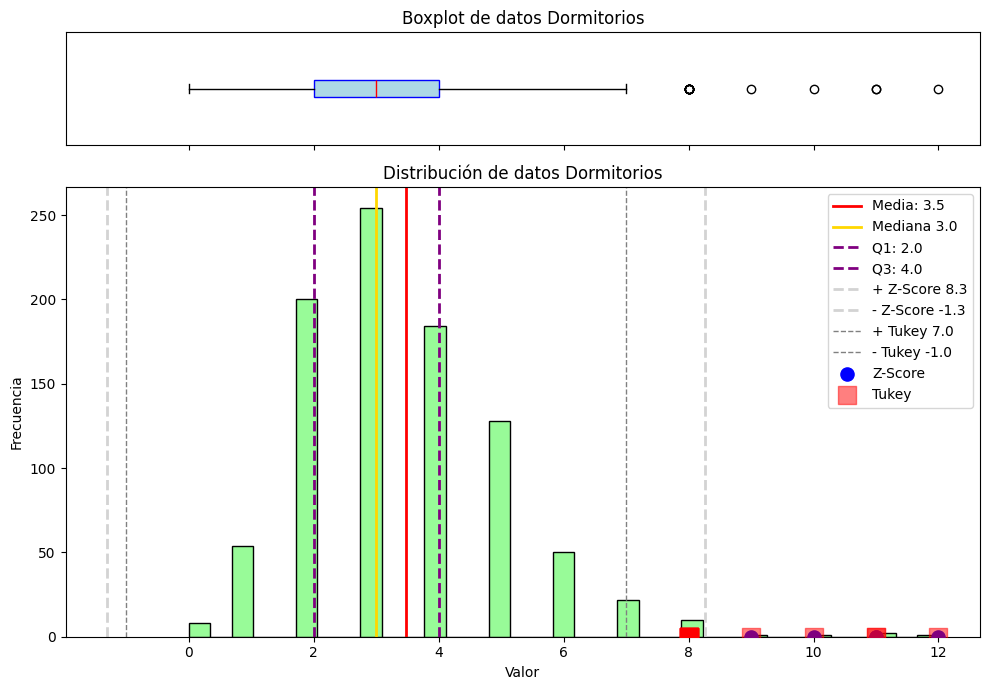

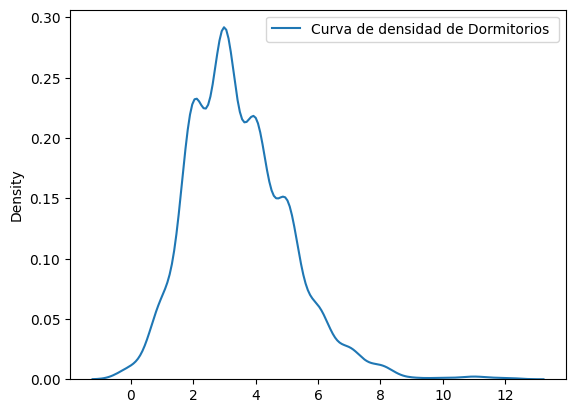

In [10]:
# Calcular los estadísticos para dormitorios
estadisticos_bedrooms = estadisticos(bedrooms)
print("Estadísticos para dormitorios:")
imprimir_estadisticas(estadisticos_bedrooms)
plot_data(bedrooms, 'Dormitorios')


Estadísticos para baños:
Minimo: 1
Maximo: 12
Media: 2.901
Q1 (Primer Cuartil): 2.00
Q2 (Mediana): 3.00
Q3 (Tercer Cuartil): 4.00
Rango Intercuartil: 2.00
Desviación Estándar: 1.6256


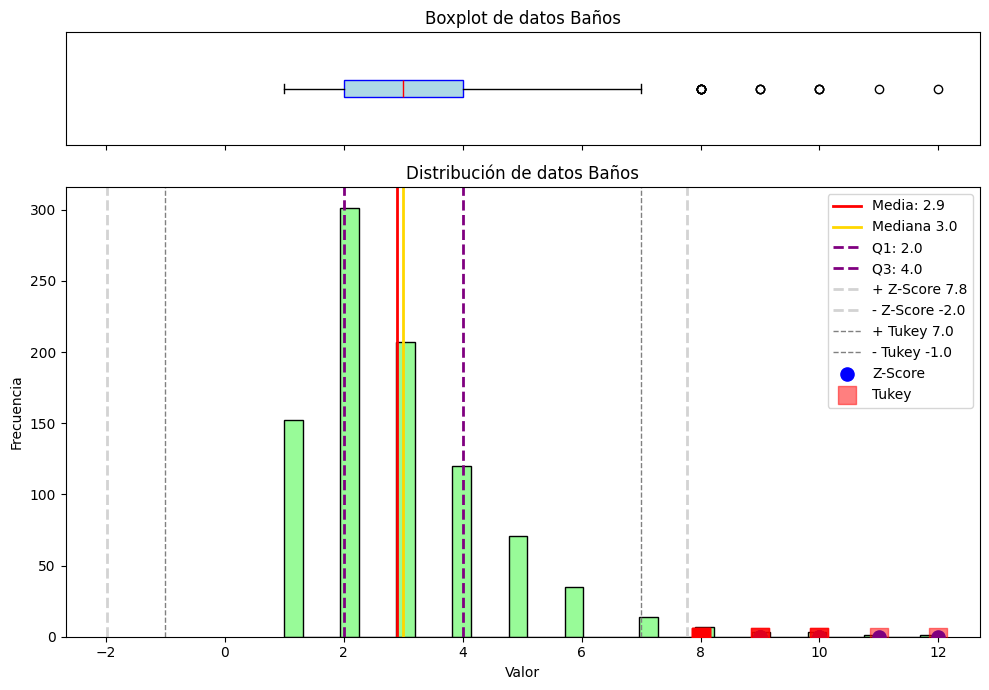

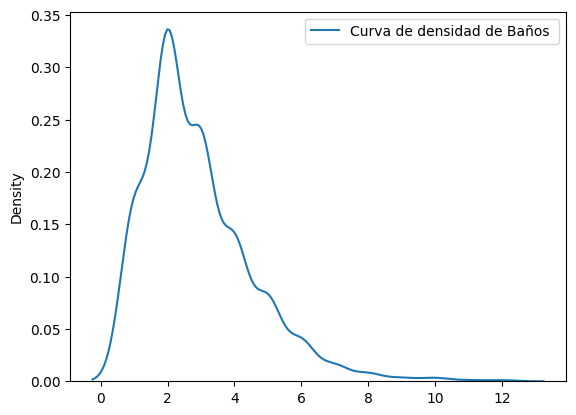

In [11]:
# Calcular los estadísticos para baños
estadisticos_bathrooms = estadisticos(bathrooms)
print("Estadísticos para baños:")
imprimir_estadisticas(estadisticos_bathrooms)
plot_data(bathrooms, 'Baños')

Estadísticos para metros2:
Minimo: 14
Maximo: 1,768
Media: 217.238
Q1 (Primer Cuartil): 104.00
Q2 (Mediana): 158.00
Q3 (Tercer Cuartil): 264.00
Rango Intercuartil: 160.00
Desviación Estándar: 191.6410


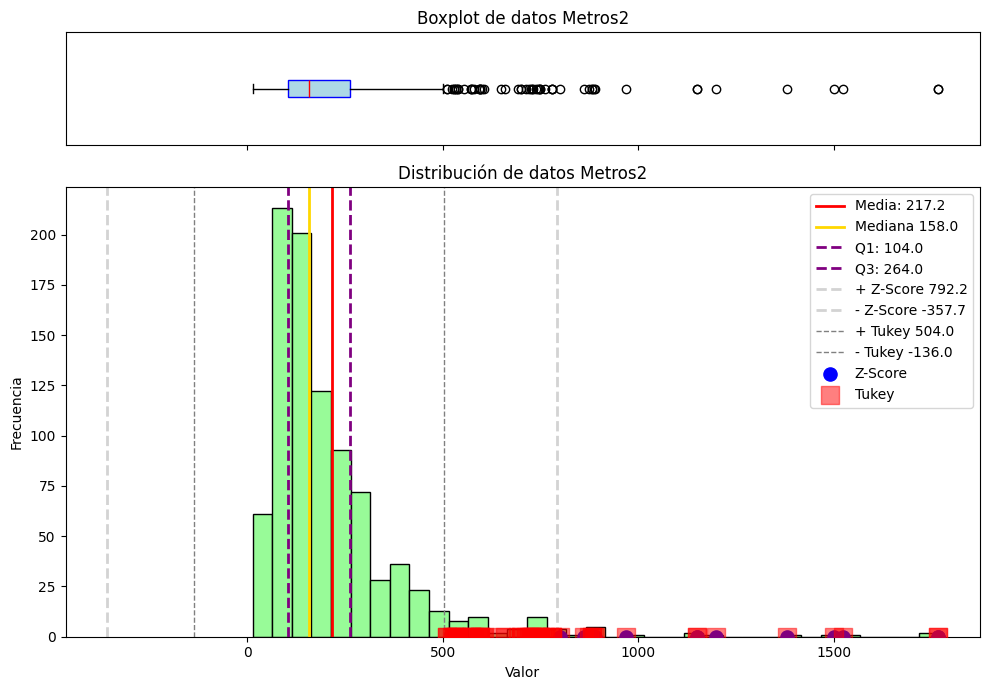

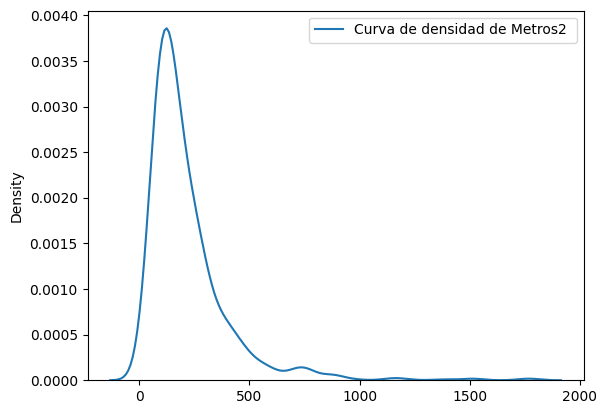

In [12]:
# Calcular los estadísticos para metros2
estadisticos_m2 = estadisticos(m2)
print("Estadísticos para metros2:")
imprimir_estadisticas(estadisticos_m2)
plot_data(m2, 'Metros2')

## FILTRAR DATOS

In [13]:
# Calcular la media de las casas el 20 % más baratas y el 20 % más caras
percentil_20 = np.percentile(price, 20)
percentil_80 = np.percentile(price, 80)
print(f"percentil 20: {percentil_20:,.2f}")
print(f"percentil 80: {percentil_80:,.2f}")

casas_mas_baratas = price[price <= percentil_20]

casas_mas_caras = price[price >= percentil_80]

print("20 % de casas mas baratas")
print(casas_mas_baratas.shape)
print(f"media: {np.mean(casas_mas_baratas):,.2f}")
print("20 % de casas mas caras")
print(casas_mas_caras.shape)
print(f"media: {np.mean(casas_mas_caras):,.2f}")

percentil 20: 529,900.00
percentil 80: 1,850,000.00
20 % de casas mas baratas
(184,)
media: 350,706.89
20 % de casas mas caras
(185,)
media: 2,915,162.16


## Calculamos el 20 % de los barrios mas baratos

In [57]:
def calcular_media_por_barrio(price, address):
# Crear diccionario para almacenar los precios por barrio
    precios_por_barrio = defaultdict(list)
    for barrio, precio in zip(address, price):
        precios_por_barrio[barrio].append(precio)
        # se crean dos tablas para los barrios mas baratos y caros y cpoderlos usar con el counter
        if precio <= percentil_20:
            barrios_con_pisos_mas_baratos.append(barrio)
        elif precio >= percentil_80:
            barrios_con_pisos_mas_caros.append(barrio)

    # Calcular la mediana de los precios por barrio y añadir la cantidad de precios
    mediana_precios_por_barrio = {}
    for barrio, precios in precios_por_barrio.items():
        mediana_precios_por_barrio[barrio] = (np.median(precios), len(precios))
    
    # Ordenar los barrios por mediana de precios    
    barrios_ordenados = sorted(mediana_precios_por_barrio.items(), key=lambda x: x[1][0])
    barrios_ordenados = dict(barrios_ordenados)
    
    return barrios_ordenados


In [56]:

# Agrupar precios por barrio
barrios_con_pisos_mas_baratos = []
barrios_con_pisos_mas_caros = []
barrios_por_mediana = calcular_media_por_barrio(price, address)

In [45]:

barrios_mas_baratos = []
barrios_mas_caros = []
for barrio, (mediana, cantidad) in barrios_por_mediana.items():
    if mediana <= percentil_20:
        barrios_mas_baratos.append(barrio)
    elif mediana >= percentil_80:
        barrios_mas_caros.append(barrio)


In [42]:
# Listar los barrios más baratos
print("Barrios más baratos (20%):")
for barrio in barrios_mas_baratos:
    print(barrio)

Barrios más baratos (20%):
San Diego
12 de Octubre-Orcasur
Zofío
Ensanche de Vallecas - La Gavia
San Fermín
Vista Alegre
Almendrales
Los Ángeles
Puente de Vallecas
Ventas
Pueblo Nuevo
Buena Vista
Amposta
San Isidro
Quintana
Opañel
Butarque
Latina
Simancas
Barajas
Moratalaz
Rejas
Berruguete
Bellas Vistas
Chopera
Pinar del Rey
Concepción
Pau de Carabanchel
Campamento
Lavapiés-Embajadores
Valdeacederas
Pacífico
Comillas
Casco Histórico de Barajas
Valdezarza
Imperial
Acacias
Guindalera
La Paz
Palos de Moguer
Costillares


## Calculamos el 20 % de los barrios mas caros


In [43]:
# Listar los barrios más baratos
print("Barrios más caros (20%):")
for barrio in barrios_mas_caros:
    print(barrio)



Barrios más caros (20%):
El Viso
Canillejas
Conde Orgaz-Piovera
Ciudad Jardín
Mirasierra
Nueva España
Almagro


## MODA

In [58]:
contador_mas_baratos = Counter(barrios_con_pisos_mas_baratos)
contador_mas_caros = Counter(barrios_con_pisos_mas_caros)

In [59]:
# 10 mas frecuentes
contador_mas_baratos.most_common(10)

[(np.str_('Lavapiés-Embajadores'), 12),
 (np.str_('Valdeacederas'), 10),
 (np.str_('Centro'), 9),
 (np.str_('Guindalera'), 6),
 (np.str_('Hortaleza'), 6),
 (np.str_('Fuencarral'), 5),
 (np.str_('Chueca-Justicia'), 5),
 (np.str_('Malasaña-Universidad'), 5),
 (np.str_('Simancas'), 5),
 (np.str_('San Isidro'), 4)]

In [60]:
# 10 mas frecuentes
contador_mas_caros.most_common(10)

[(np.str_('Hortaleza'), 21),
 (np.str_('Barrio de Salamanca'), 20),
 (np.str_('Chamartín'), 19),
 (np.str_('Moncloa'), 19),
 (np.str_('Almagro'), 13),
 (np.str_('Chamberí'), 11),
 (np.str_('Recoletos'), 9),
 (np.str_('Fuencarral'), 8),
 (np.str_('Castellana'), 7),
 (np.str_('Centro'), 6)]

In [20]:
contador = Counter(address)
# 10 menos frecuentes
manufaturers_sorted = sorted(contador.items(), key=lambda item: item[1])
manufaturers_sorted[:10]


[(np.str_('Comillas'), 1),
 (np.str_('Bellas Vistas'), 1),
 (np.str_('Pau de Carabanchel'), 1),
 (np.str_('Zofío'), 1),
 (np.str_('Legazpi'), 1),
 (np.str_('Pinar del Rey'), 1),
 (np.str_('Opañel'), 1),
 (np.str_('El Cañaveral'), 1),
 (np.str_('Sanchinarro'), 1),
 (np.str_('Concepción'), 1)]

In [21]:
for position, barrio in enumerate(contador.items()):
    
    if 20 > position > 10:
        print(f"{barrio[0]} {barrio[1]}")

Chamberí 34
Nueva España 8
Conde Orgaz-Piovera 10
Chueca-Justicia 19
Argüelles 12
Nuevos Ministerios-Ríos Rosas 10
Centro 47
Moncloa 48
Retiro 21


In [22]:

# Mostrar los 10 barrios que más casas tienen en este dataset
top_10 = contador.most_common(10)
for barrio, count in top_10:
    print(f"el Barrio: {barrio} tiene {count} casas")

el Barrio: Barrio de Salamanca tiene 63 casas
el Barrio: Hortaleza tiene 60 casas
el Barrio: Chamartín tiene 54 casas
el Barrio: Moncloa tiene 48 casas
el Barrio: Centro tiene 47 casas
el Barrio: Fuencarral tiene 35 casas
el Barrio: Chamberí tiene 34 casas
el Barrio: Malasaña-Universidad tiene 25 casas
el Barrio: Goya tiene 22 casas
el Barrio: Lista tiene 22 casas


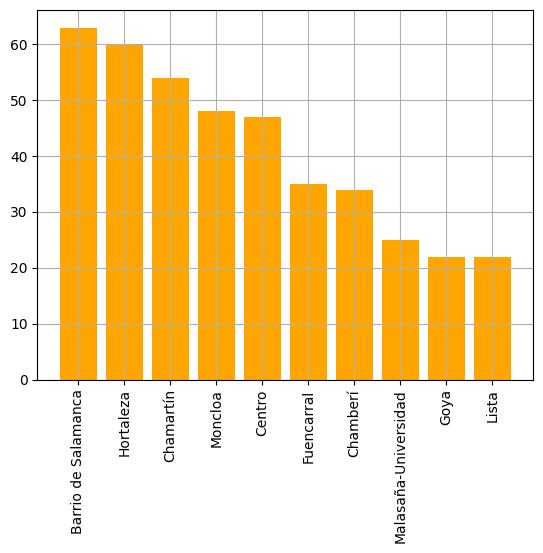

In [23]:
barrio, conteos =  zip(*top_10) 
plt.bar(barrio, conteos, color='orange')
plt.xticks(rotation=90)
plt.grid()

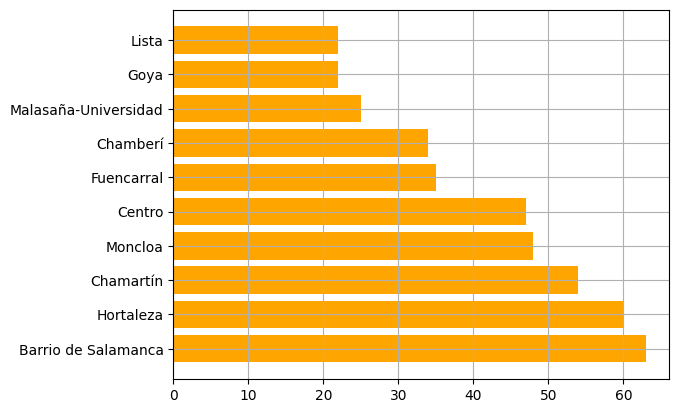

In [24]:
plt.barh(barrio, conteos, color='orange')
plt.xticks()
plt.grid()

## CORRELACIÓN

In [25]:
stats.pearsonr(m2, price)[0]

np.float64(0.681762407588213)

* 1: correlación positiva
* 0: no hay correlación
* -1: correlación negativa

0,68 lo interpretaríamos como que hay una correlación positiva entre metros2 y precio de las casas. Es decir, que cuántos más metros2 son mas caras.

In [26]:
columnas = [m2, bedrooms, bathrooms, price] # 4 columnas del CSV

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
    
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)

[[1.         0.71265478 0.81873292 0.68176241]
 [0.71265478 1.         0.77076481 0.55718932]
 [0.81873292 0.77076481 1.         0.69162529]
 [0.68176241 0.55718932 0.69162529 1.        ]]


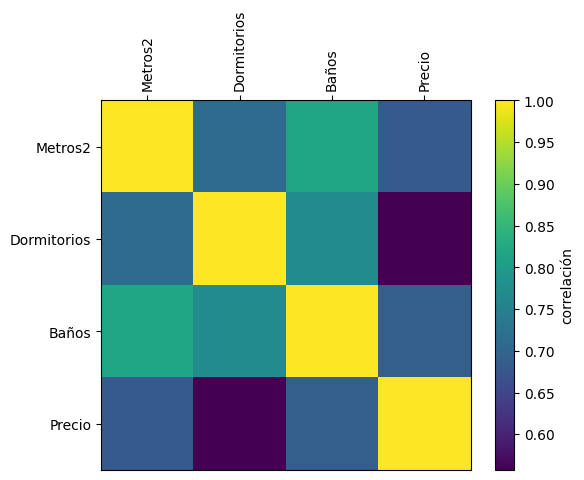

In [27]:
column_names = ['Metros2', 'Dormitorios', 'Baños', 'Precio']
plt.imshow(matriz, cmap='viridis')
plt.colorbar(label='correlación')
plt.xticks(range(len(column_names)), column_names, rotation=90)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position('top')

<Axes: >

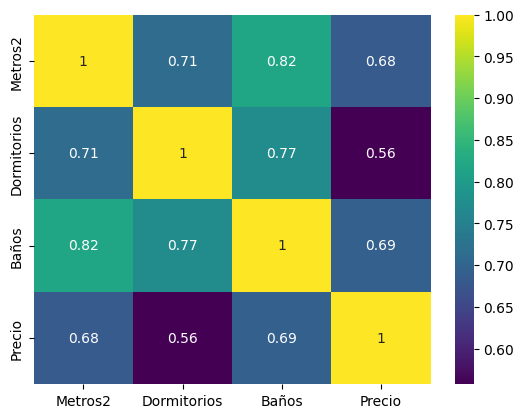

In [28]:
# plt.figure(figsize= (10,8))
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names)

## ESTANDARIZACIÓN

In [29]:
# estandarizar y volver a pintar el histograma
mean_precios = np.mean(price)
median_precios = np.median(price)
std_precios = np.std(price)

print(f"Media original precios: {mean_precios:,.3f}")
print(f"Mediana original precios: {median_precios:,.3f}")
print(f"Desviación estandar original precios: {std_precios:,.3f}")

mean_m2 = np.mean(m2)
median_m2 = np.median(m2)
std_m2 = np.std(m2)

print(f"Media original metros cuadrados: {mean_m2:,.3f}")
print(f"Mediana original metros cuadrados: {median_m2:,.3f}")
print(f"Desviación estandar original metros cuadrados: {std_m2:,.3f}")

Media original precios: 1,290,575.262
Mediana original precios: 990,000.000
Desviación estandar original precios: 1,036,073.402
Media original metros cuadrados: 217.238
Mediana original metros cuadrados: 158.000
Desviación estandar original metros cuadrados: 191.641


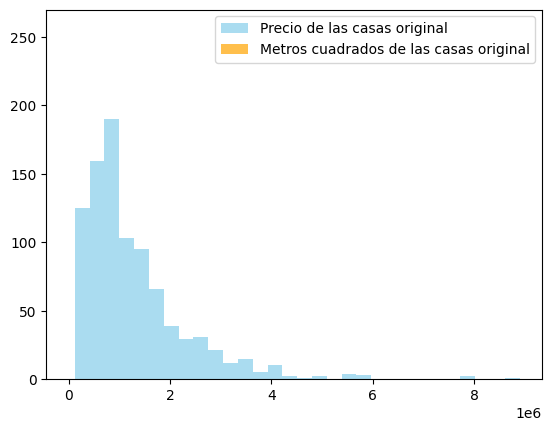

In [30]:
plt.hist(price, bins=30, color="skyblue", alpha=0.7, label="Precio de las casas original")
plt.hist(m2, bins=30, color="orange", alpha=0.7, label="Metros cuadrados de las casas original")
plt.legend();

In [31]:
precios_standard = (price - mean_precios) / std_precios
print(precios_standard[:5])

[0.60750979 0.67989849 0.00909659 0.3469105  0.28972343]


In [32]:
m2_standard = (m2 - mean_m2) / std_m2
print(m2_standard[:5])

[-0.17865826 -0.24649343  0.27531553  0.16051756 -0.52827026]


In [33]:
# estandarizar y volver a pintar el histograma
mean_precios = np.mean(precios_standard)
median_precios = np.median(precios_standard)
std_precios = np.std(precios_standard)

print(f"Media original precios: {mean_precios:,.3f}")
print(f"Mediana original precios: {median_precios:,.3f}")
print(f"Desviación estandar original precios: {std_precios:,.3f}")

# estandarizar y volver a pintar el histograma
mean_m2 = np.mean(m2_standard)
median_m2 = np.median(m2_standard)
std_m2 = np.std(m2_standard)

print(f"Media original metros cuadrados: {mean_m2:,.3f}")
print(f"Mediana original metros cuadrados: {median_m2:,.3f}")
print(f"Desviación estandar original metros cuadrados: {std_m2:,.3f}")

Media original precios: -0.000
Mediana original precios: -0.290
Desviación estandar original precios: 1.000
Media original metros cuadrados: 0.000
Mediana original metros cuadrados: -0.309
Desviación estandar original metros cuadrados: 1.000


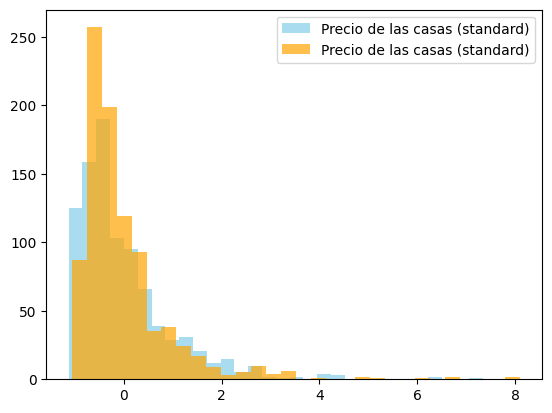

In [34]:
plt.hist(precios_standard, bins=30, color="skyblue", alpha=0.7, label="Precio de las casas (standard)")
plt.hist(m2_standard, bins=30, color="orange", alpha=0.7, label="Precio de las casas (standard)")
plt.legend();

## ASIMETRÍA Y CURTOSIS

In [35]:
# coeficiente de asimetría (skewness)

print(f"Coeficiente de asimetría Precio: {stats.skew(price)}")
print(f"Coeficiente de asimetría Metros cuadrados: {stats.skew(m2)}")
print(f"Coeficiente de asimetría Dormitorios: {stats.skew(bedrooms)}")
print(f"Coeficiente de asimetría Baños: {stats.skew(bathrooms)}")

Coeficiente de asimetría Precio: 2.299673447902698
Coeficiente de asimetría Metros cuadrados: 3.358506945156488
Coeficiente de asimetría Dormitorios: 0.8842091486712003
Coeficiente de asimetría Baños: 1.406223480498869


Interpretación:

* No es cercano a 0 por lo que hay asimetría, es decir, que la distribución no es simétrica.


In [36]:
# curtosis:
print(f"Curtosis Precio: {stats.kurtosis(price)}")
print(f"Curtosis Metros cuadrados: {stats.kurtosis(m2)}")
print(f"Curtosis Dormitorios: {stats.kurtosis(bedrooms)}")
print(f"Curtosis Baños: {stats.kurtosis(bathrooms)}")


Curtosis Precio: 8.547211919938682
Curtosis Metros cuadrados: 17.229111152834456
Curtosis Dormitorios: 1.9002632477464054
Curtosis Baños: 3.038919834628685


Interpretación:

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera.
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.

Se aprecia un decimiento lento


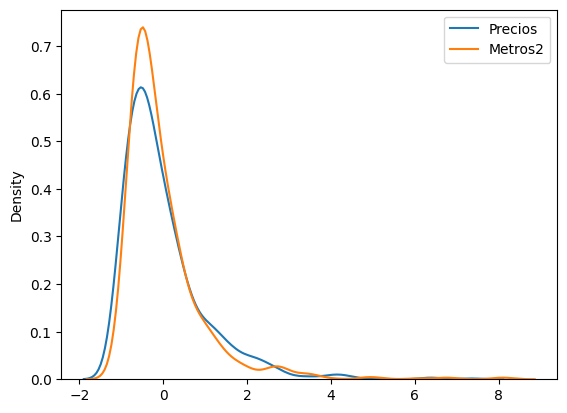

In [37]:
sns.kdeplot(precios_standard, label="Precios")
sns.kdeplot(m2_standard, label="Metros2")


plt.legend();

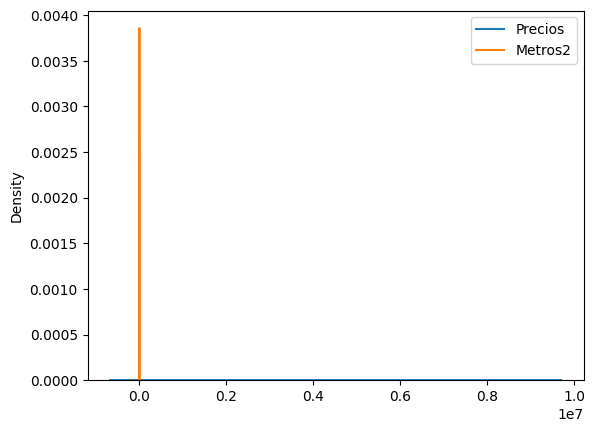

In [38]:
sns.kdeplot(price, label="Precios")
sns.kdeplot(m2, label="Metros2")
plt.legend();


## CONTRASTE DE HIPÓTESIS

Ejercicio 12:

- Realiza un contraste de hipótesis y comprueba que:Contraste de hipótesis:
    * Que las casas de X barrio son más baratas de las de Y barrio
    * Que las casas de >= 3 baños son más caras que las casas de 1-2 baños
    
_**Pista**: hay que aplicar una prueba **t de Student** para **muestras pareadas** `stats.ttest_rel()`, o una prueba **Wilcoxon** para **muestras pareadas** `stats.wilcoxon()`, dependiendo de si se cumplen los supuestos de normalidad y homogeneidad de varianzas. Pueden especificar el parámetro `alternative` con el argumento `"greater"` para un contraste de tipo `a>b`._

### Contraste de hipótesis para comparar precios de casas entre dos barrios:
- Hipótesis nula (H0): El precio medio de las casas en el barrio X es igual al precio medio de las casas en el barrio Y.
- Hipótesis alternativa (H1): El precio medio de las casas en el barrio X es menor al precio medio de las casas en el barrio Y.

In [39]:

# Preparamos los datos para la comparación de barrios
precios_barrio_X = [precio for precio, barrio in zip(price, address) if barrio == 'Barrio de Salamanca']
precios_barrio_Y = [precio for precio, barrio in zip(price, address) if barrio == 'Hortaleza']

# Verificamos si los datos cumplen los supuestos de normalidad
normalidad_X = stats.shapiro(precios_barrio_X).pvalue > 0.05
normalidad_Y = stats.shapiro(precios_barrio_Y).pvalue > 0.05

print(f"Normalidad Barrio X: {normalidad_X}, Normalidad Barrio Y: {normalidad_Y}")

# Pruebas de homogeneidad de varianzas
homogeneidad_barrios = stats.levene(precios_barrio_X, precios_barrio_Y).pvalue > 0.05

print(f"Homogeneidad Barrios: {homogeneidad_barrios}")

# Selección y aplicación de la prueba adecuada
comparacion = normalidad_X and normalidad_Y and homogeneidad_barrios
# Comparación de precios entre barrios
if comparacion:
    # Prueba t de Student para muestras independientes
    t_stat, p_value = stats.ttest_ind(precios_barrio_X, precios_barrio_Y, alternative='less')
else:
    # Prueba de Wilcoxon para muestras independientes
    t_stat, p_value = stats.mannwhitneyu(precios_barrio_X, precios_barrio_Y, alternative='less')

print(f"Contraste de Hipótesis Barrios - Estadístico t: {t_stat:,.3f}, Valor p: {p_value:,.3f}")

Normalidad Barrio X: False, Normalidad Barrio Y: False
Homogeneidad Barrios: True
Contraste de Hipótesis Barrios - Estadístico t: 1,850.000, Valor p: 0.421


Repetimos el contrarte de hipotesis con la trasformacion logaritmica de los precios, pero con otros barrios mas extremos

In [40]:
# Transformación logarítmica
log_precios = np.log(price)

# Preparamos los datos para la comparación de barrios
log_precios_barrio_X = [precio for precio, barrio in zip(log_precios, address) if barrio == 'Lavapiés-Embajadores']
log_precios_barrio_Y = [precio for precio, barrio in zip(log_precios, address) if barrio == 'Almagro']

# Verificamos si los datos transformados cumplen los supuestos de normalidad
normalidad_X = stats.shapiro(log_precios_barrio_X).pvalue > 0.05
normalidad_Y = stats.shapiro(log_precios_barrio_Y).pvalue > 0.05
print(f"Normalidad Barrio Lavapiés-Embajadores: {normalidad_X}, Normalidad Barrio Almagro: {normalidad_Y}")

# Pruebas de homogeneidad de varianzas
homogeneidad_barrios = stats.levene(log_precios_barrio_X, log_precios_barrio_Y).pvalue > 0.05

print(f"Homogeneidad Barrios: {homogeneidad_barrios}")

# Selección y aplicación de la prueba adecuada

comparacion = normalidad_X and normalidad_Y and homogeneidad_barrios
# Comparación de precios entre barrios
if comparacion:
    # Prueba t de Student para muestras independientes
    t_stat, p_value = stats.ttest_ind(log_precios_barrio_X, log_precios_barrio_Y, alternative='less')
else:
    # Prueba de Wilcoxon para muestras independientes
    t_stat, p_value = stats.mannwhitneyu(log_precios_barrio_X, log_precios_barrio_Y, alternative='less')

print(f"Contraste de Hipótesis Barrios - Estadístico t: {t_stat:.3f}, Valor p: {p_value:.4f}")


Normalidad Barrio Lavapiés-Embajadores: True, Normalidad Barrio Almagro: False
Homogeneidad Barrios: True
Contraste de Hipótesis Barrios - Estadístico t: 4.000, Valor p: 0.0000


### Contraste de hipótesis para comparar precios de casas según el número de baños:
- Hipótesis nula (H0): El precio medio de las casas con >= 3 baños es igual al precio medio de las casas con 1-2 baños.
- Hipótesis alternativa (H1): El precio medio de las casas con >= 3 baños es mayor al precio medio de las casas con 1-2 baños.

In [41]:

# Preparamos los datos para la comparación de baños
precios_3_banhos = [precio for precio, banho in zip(price, bathrooms) if banho >= 3]
precios_1_2_banhos = [precio for precio, banho in zip(price, bathrooms) if banho in [1, 2]]

# Verificamos si los datos cumplen los supuestos de normalidad
normalidad_3_banhos = stats.shapiro(precios_3_banhos).pvalue > 0.05
normalidad_1_2_banhos = stats.shapiro(precios_1_2_banhos).pvalue > 0.05

print(f"Normalidad 3 Baños: {normalidad_3_banhos}, Normalidad 1-2 Baños: {normalidad_1_2_banhos}")

# Pruebas de homogeneidad de varianzas
homogeneidad_banhos = stats.levene(precios_3_banhos, precios_1_2_banhos).pvalue > 0.05

print(f"Homogeneidad Baños: {homogeneidad_banhos}")

# Selección y aplicación de la prueba adecuada

# Comparación de precios entre barrios
comparacion = normalidad_3_banhos and normalidad_1_2_banhos and homogeneidad_banhos
# Comparación de precios según el número de baños
if comparacion:
    # Prueba t de Student para muestras independientes
    t_stat, p_value = stats.ttest_ind(precios_3_banhos, precios_1_2_banhos, alternative='greater')
else:
    # Prueba de Wilcoxon para muestras independientes
    t_stat, p_value = stats.mannwhitneyu(precios_3_banhos, precios_1_2_banhos, alternative='greater')

print(f"Contraste de Hipótesis Baños - Estadístico t: {t_stat:,.3f}, Valor p: {p_value}")


Normalidad 3 Baños: False, Normalidad 1-2 Baños: False
Homogeneidad Baños: False
Contraste de Hipótesis Baños - Estadístico t: 192,936.000, Valor p: 1.952124026653252e-108
